In [1]:
import networkx as nx

# **Graph**

Graphs are used to model relationships between objects. NetworkX is a Python library that allows for the creation, manipulation, and analysis of these graphs.

- A graph is a data structure consisting of two components: nodes (vertices) and edges. 

- A graph G can be defined as G = (V, E), where V is the set of nodes, and E are the edges between them.

In [2]:
G=nx.Graph()

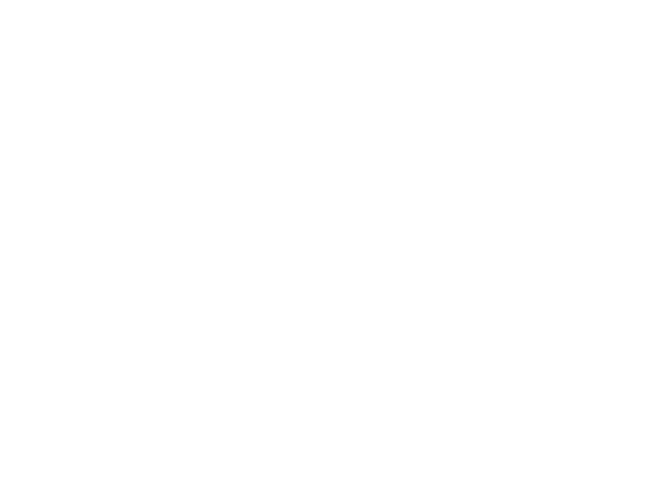

In [3]:
nx.draw(G)

# **Nodes**
- The graph G can be grown in several ways. 
- NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. 
- To get started though we’ll look at simple manipulations. 
You can add one node at a time.

In [4]:
G.add_node(1)

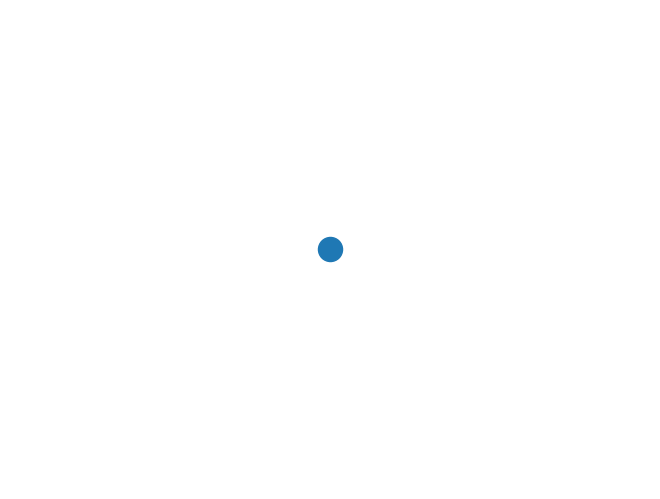

In [5]:
nx.draw(G)

In [6]:
G.add_nodes_from([2,3])

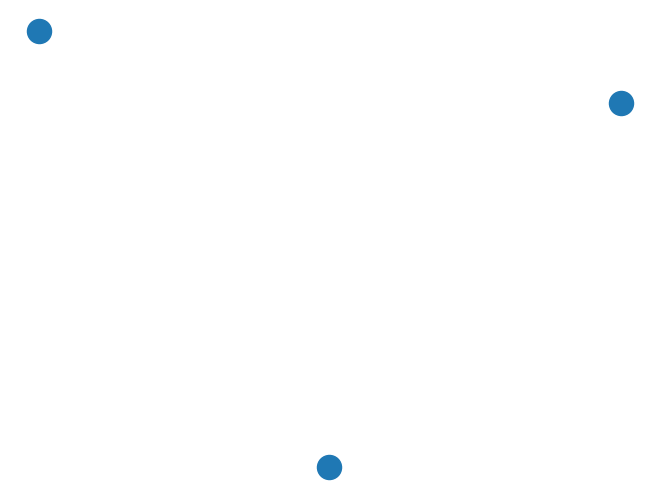

In [7]:
nx.draw(G)

In [8]:
G.add_edge(1,2)

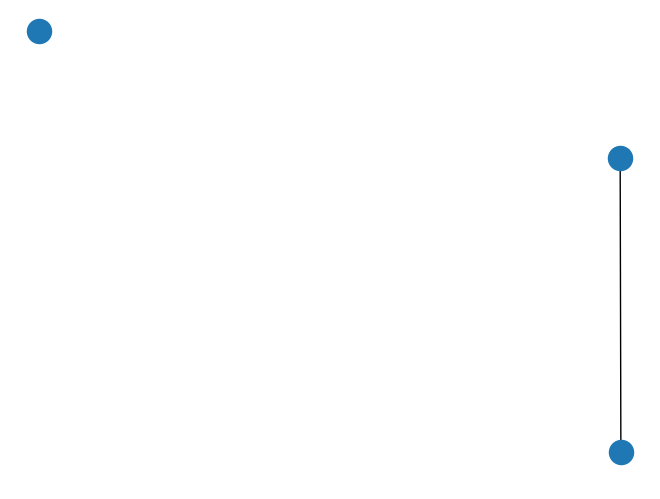

In [9]:
nx.draw(G)

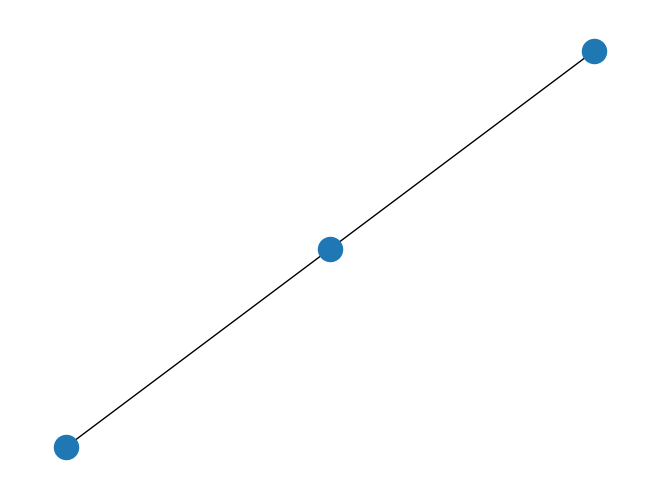

In [10]:
G.add_edge(1,3)
nx.draw(G)

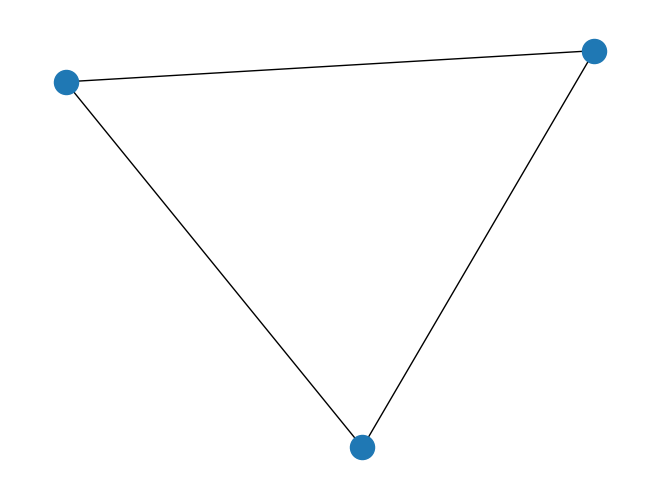

In [11]:
G.add_edge(3,2)
nx.draw(G)

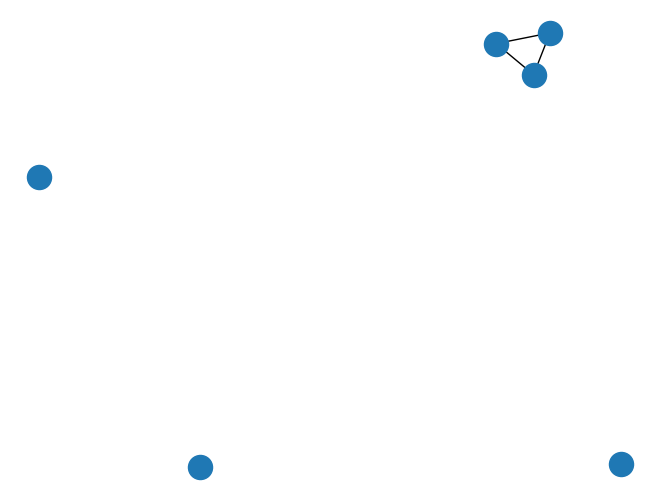

In [12]:
G.add_nodes_from([4,5,6])
nx.draw(G)

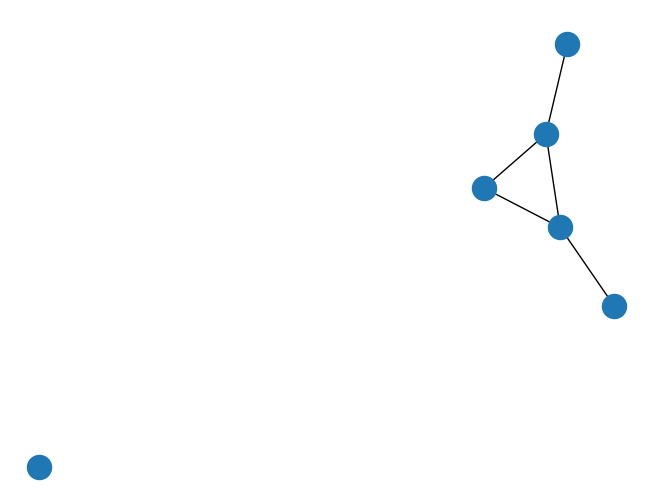

In [13]:
G.add_edges_from([(1,6),(2,5)])
nx.draw(G)

In [14]:
G.number_of_nodes()

6

In [15]:
G.number_of_edges()

5

In [16]:
G.edges

EdgeView([(1, 2), (1, 3), (1, 6), (2, 3), (2, 5)])

In [17]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6))

In [18]:
G.graph

{}

In [19]:
from networkx.readwrite import json_graph

In [20]:
json_data = json_graph.node_link_data(G)
json_data

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 5}, {'id': 6}],
 'links': [{'source': 1, 'target': 2},
  {'source': 1, 'target': 3},
  {'source': 1, 'target': 6},
  {'source': 2, 'target': 3},
  {'source': 2, 'target': 5}]}

In [21]:
json_data_to_graph = json_graph.node_link_graph(json_data)

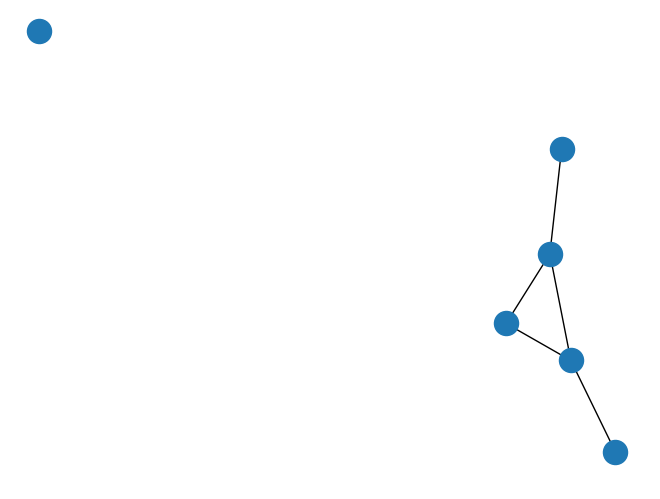

In [22]:
nx.draw(json_data_to_graph)

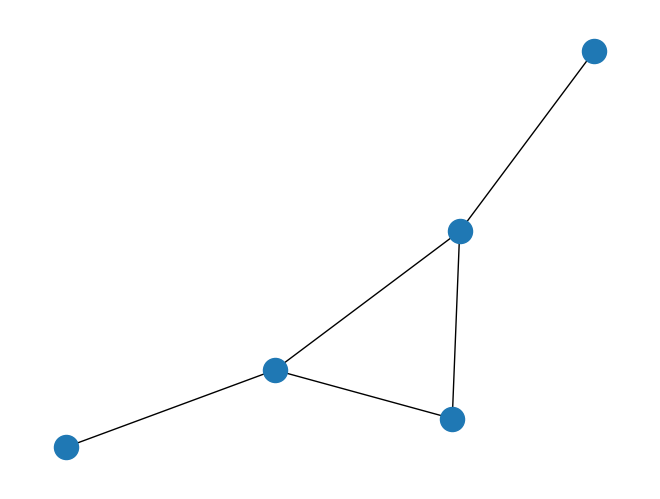

In [23]:
G.remove_nodes_from([4])
nx.draw(G)

In [24]:
G.is_directed()

False

In [25]:
G.is_multigraph()

False

In [26]:
G.order()

5

In [27]:
# https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html
from networkx.classes.function import density
density(G)

0.5

In [28]:
#https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.degree.html
from networkx.classes.function import degree
degree(G, nbunch=None, weight=None)

DegreeView({1: 3, 2: 3, 3: 2, 5: 1, 6: 1})

In [29]:
from networkx.classes.function import degree_histogram
degree_histogram(G)

[0, 2, 1, 2]

In [30]:
for node in G.nodes():
    print(node, list(G.neighbors(node)))

1 [2, 3, 6]
2 [1, 3, 5]
3 [1, 2]
5 [2]
6 [1]


# **Directional Graph**
- If there are directional dependencies between nodes then edges are directed.
- If not, edges are undirected.

True
True


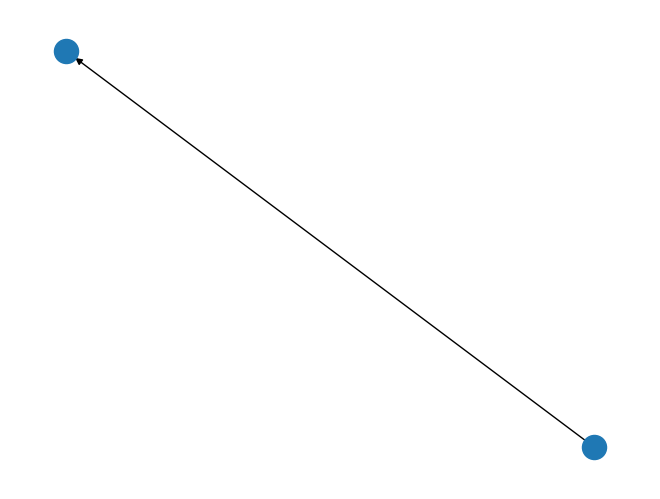

In [31]:
G = nx.DiGraph()
G.add_edge(1, 2, weight=1)
nx.draw(G)
print(nx.is_weighted(G))
print(nx.is_directed(G))

In [32]:
G.nodes()

NodeView((1, 2))

In [33]:
G.order()

2

In [34]:
G.edges()

OutEdgeView([(1, 2)])

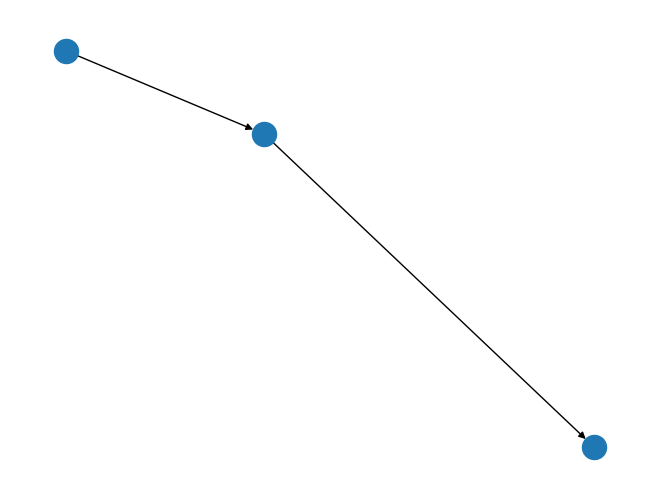

In [35]:
G.add_edge(3, 1, weight=6)
nx.draw(G)

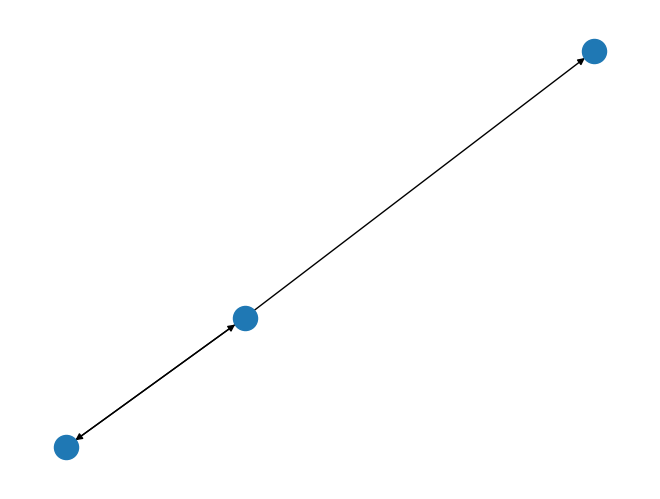

In [36]:
G.add_edge(1, 3, weight=2)
nx.draw(G)

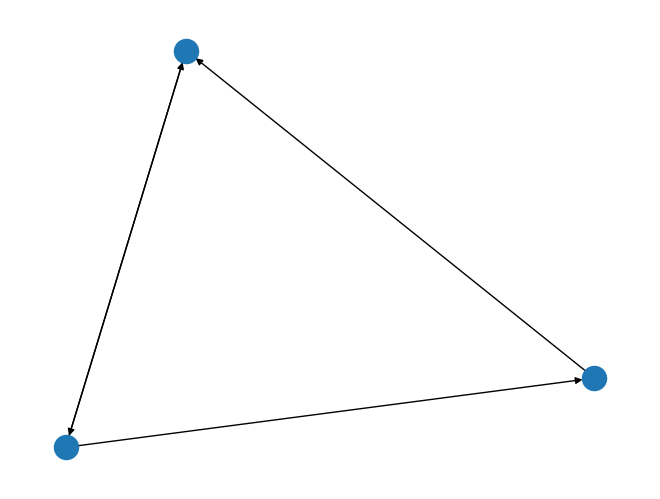

In [37]:
G.add_edge(2, 3, weight=2)
nx.draw(G)

In [38]:
print(G.order())
print(G.number_of_edges())
print(G.number_of_nodes())

3
4
3


# **Neighbor and Adjacency**

In [39]:
for x in G.nodes:
    print('Neighbors for ' + str(x) + ':')
    print([n for n in G.neighbors(x)])

Neighbors for 1:
[2, 3]
Neighbors for 2:
[3]
Neighbors for 3:
[1]


In [40]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 2]
 [0 0 2]
 [6 0 0]]


In [41]:
A.setdiag(A.diagonal() - 1)
print(A.todense())

[[-1  1  2]
 [ 0 -1  2]
 [ 6  0 -1]]


/opt/conda/lib/python3.10/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [42]:
N = nx.to_numpy_array(G)
print(N)

[[0. 1. 2.]
 [0. 0. 2.]
 [6. 0. 0.]]


[(0, 1, 0), (1, 0, 0), (2, 2, 0), (2, 2, 1)]
[0, 1, 2]


array([[0., 2., 0.],
       [1., 0., 0.],
       [0., 0., 5.]])

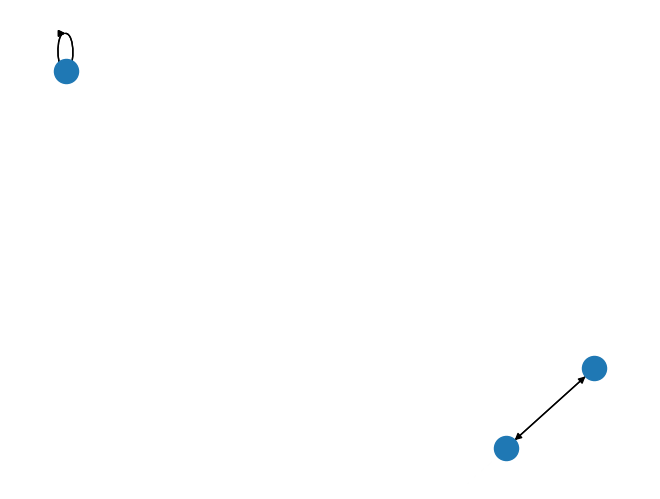

In [43]:
G = nx.MultiDiGraph()
G.add_edge(0, 1, weight=2)
G.add_edge(1, 0)
G.add_edge(2, 2, weight=3)
G.add_edge(2, 2, weight=2)
nx.draw(G)
print(G.edges)
print(G.nodes)
nx.to_numpy_array(G, nodelist=[0, 1, 2])

In [44]:
df = nx.to_pandas_edgelist(json_data_to_graph)
df

,source,target
0,1,2
1,1,3
2,1,6
3,2,3
4,2,5


[('A', 'B'), ('A', 'C'), ('A', 'E'), ('C', 'E')]
['A', 'B', 'C', 'E']
--------------------


,source,target,strength,weight,cost
0,A,B,5,7,1
1,A,C,3,5,3
2,A,E,8,4,7
3,C,E,2,10,9


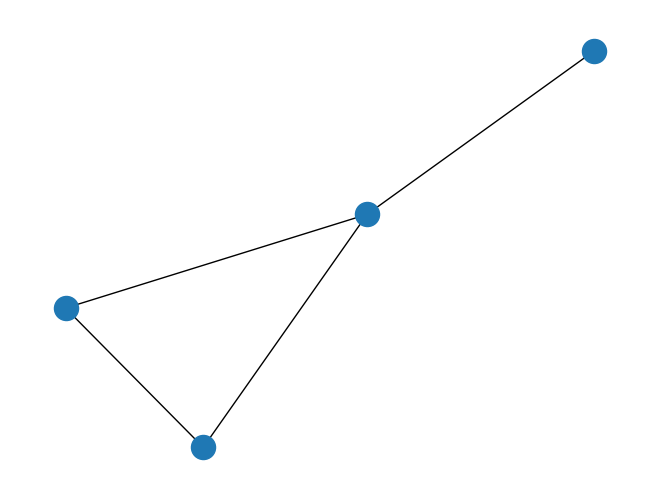

In [45]:
G = nx.Graph(
    [
        ("A", "B", {"cost": 1, "weight": 7, "strength": 5}),
        ("C", "E", {"cost": 9, "weight": 10, "strength": 2}),
        ("A", "C", {"cost": 3, "weight": 5, "strength": 3}),
        ("A", "E", {"cost": 7, "weight": 4, "strength": 8}),
    ]
)
nx.draw(G)
print(G.edges)
print(G.nodes)
print("--------------------")
df = nx.to_pandas_edgelist(G)
df

[('A', 'B'), ('A', 'C'), ('A', 'E'), ('C', 'E')]
['A', 'B', 'C', 'E']
--------------------


,source,target,strength,weight,cost
0,A,B,5,7,1
1,A,C,3,5,3
2,A,E,8,4,7
3,C,E,2,10,9


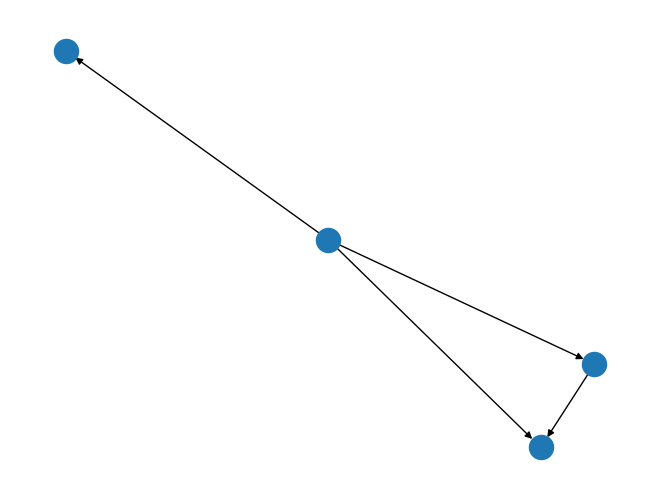

In [46]:
G = nx.DiGraph(
    [
        ("A", "B", {"cost": 1, "weight": 7, "strength": 5}),
        ("C", "E", {"cost": 9, "weight": 10, "strength": 2}),
        ("A", "C", {"cost": 3, "weight": 5, "strength": 3}),
        ("A", "E", {"cost": 7, "weight": 4, "strength": 8}),
    ]
)
nx.draw(G)
print(G.edges)
print(G.nodes)
print("--------------------")
df = nx.to_pandas_edgelist(G)
df

In [47]:
df = nx.to_pandas_edgelist(G, nodelist=["B", "E"])
df

,source,target


In [48]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[ 0  7  5  4]
 [ 0  0  0  0]
 [ 0  0  0 10]
 [ 0  0  0  0]]


In [49]:
df = nx.to_pandas_edgelist(G, nodelist=['A', 'C'], edge_key='strength')
print(df)
df = nx.to_pandas_edgelist(G, nodelist=['A', 'C'])
print(df)
df = nx.to_pandas_edgelist(G, nodelist=['A', 'C'], edge_key='ekey')
print(df)
# print(df[['source', 'target', 'cost', 'strength']])

  source target  strength  weight  cost
0      A      B         5       7     1
1      A      C         3       5     3
2      A      E         8       4     7
3      C      E         2      10     9
  source target  strength  weight  cost
0      A      B         5       7     1
1      A      C         3       5     3
2      A      E         8       4     7
3      C      E         2      10     9
  source target  strength  weight  cost
0      A      B         5       7     1
1      A      C         3       5     3
2      A      E         8       4     7
3      C      E         2      10     9


  source target  key  strength  weight  cost
0      A      B    0         5       7     1
1      A      B    1         4       6     2
2      A      C    0         3       5     3
3      A      E    0         8       4     7
4      C      E    0         2      10     9


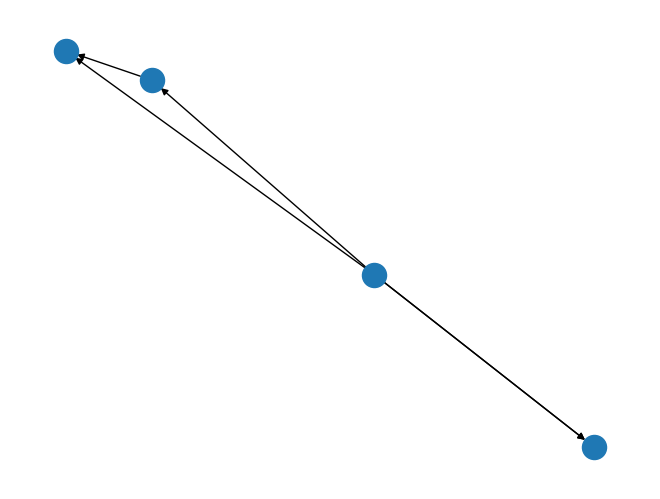

In [50]:
# Creating a MultiDiGraph with multiple edges between the same nodes
G = nx.MultiDiGraph()
G.add_edge("A", "B", key=0, cost=1, weight=7, strength=5)
G.add_edge("A", "B", key=1, cost=2, weight=6, strength=4)
G.add_edge("C", "E", key=0, cost=9, weight=10, strength=2)
G.add_edge("A", "C", key=0, cost=3, weight=5, strength=3)
G.add_edge("A", "E", key=0, cost=7, weight=4, strength=8)
nx.draw(G)

# Converting the MultiDiGraph to a pandas DataFrame
df = nx.to_pandas_edgelist(G, edge_key='key')
print(df)



  source target  key  strength  weight  cost
0      A      B    0         5       7     1
1      A      B    1         4       6     2
2      A      C    0         3       5     3
3      A      E    0         8       4     7
4      C      E    0         2      10     9


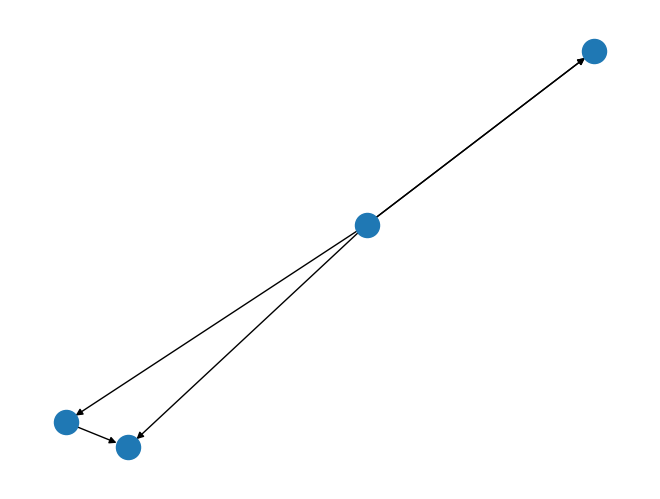

In [51]:
# Creating a MultiDiGraph with multiple edges between the same nodes
G = nx.MultiDiGraph()
G.add_edge("A", "B", cost=1, weight=7, strength=5)
G.add_edge("A", "B", cost=2, weight=6, strength=4)
G.add_edge("C", "E", cost=9, weight=10, strength=2)
G.add_edge("A", "C", cost=3, weight=5, strength=3)
G.add_edge("A", "E", cost=7, weight=4, strength=8)
nx.draw(G)

# Converting the MultiDiGraph to a pandas DataFrame
df = nx.to_pandas_edgelist(G, edge_key='key')
print(df)


# **Sudoku Graph**
- https://networkx.org/documentation/stable/reference/generated/networkx.generators.sudoku.sudoku_graph.html

81
810
--------------------
[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


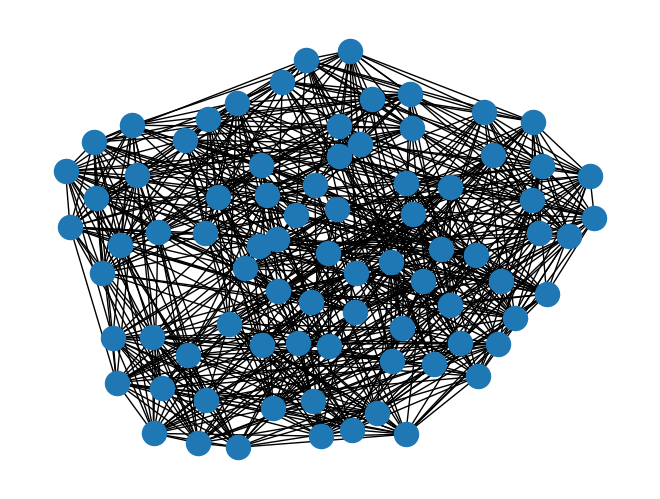

In [52]:
# default is 3x3 = 9 nodes
G = nx.sudoku_graph()
print(G.number_of_nodes())
print(G.number_of_edges())
print("--------------------")
A = nx.adjacency_matrix(G)
print(A.todense())
nx.draw(G)

16
56
--------------------
[[0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0]
 [1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0]
 [1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0]
 [1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1]
 [1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0]
 [1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0]
 [0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0]
 [0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0]
 [0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0]
 [0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1]
 [0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1]
 [1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1]
 [0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1]
 [0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1]
 [0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0]]


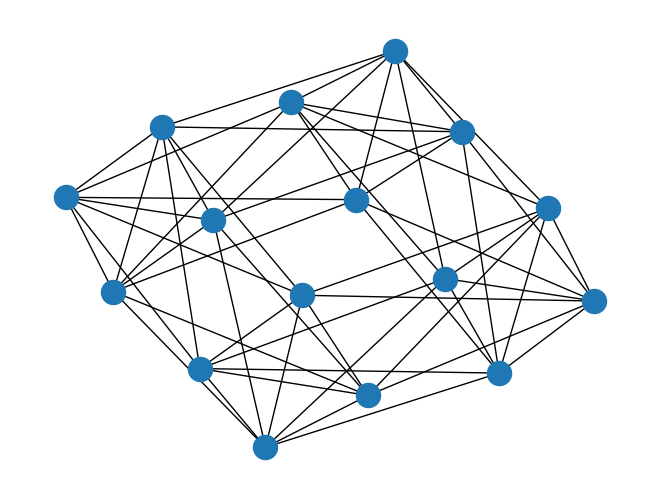

In [53]:
# default is 3x3 = 9 nodes
G = nx.sudoku_graph(n=2)
print(G.number_of_nodes())
print(G.number_of_edges())
print("--------------------")
A = nx.adjacency_matrix(G)
print(A.todense())
nx.draw(G)

# **Grid Graph**

  (0, 1)	1
  (0, 2)	1
  (0, 6)	1
  (1, 0)	1
  (1, 3)	1
  (1, 7)	1
  (2, 0)	1
  (2, 3)	1
  (2, 4)	1
  (2, 8)	1
  (3, 1)	1
  (3, 2)	1
  (3, 5)	1
  (3, 9)	1
  (4, 2)	1
  (4, 5)	1
  (4, 10)	1
  (5, 3)	1
  (5, 4)	1
  (5, 11)	1
  (6, 0)	1
  (6, 7)	1
  (6, 8)	1
  (6, 12)	1
  (7, 1)	1
  :	:
  (16, 22)	1
  (17, 11)	1
  (17, 15)	1
  (17, 16)	1
  (17, 23)	1
  (18, 12)	1
  (18, 19)	1
  (18, 20)	1
  (19, 13)	1
  (19, 18)	1
  (19, 21)	1
  (20, 14)	1
  (20, 18)	1
  (20, 21)	1
  (20, 22)	1
  (21, 15)	1
  (21, 19)	1
  (21, 20)	1
  (21, 23)	1
  (22, 16)	1
  (22, 20)	1
  (22, 23)	1
  (23, 17)	1
  (23, 21)	1
  (23, 22)	1


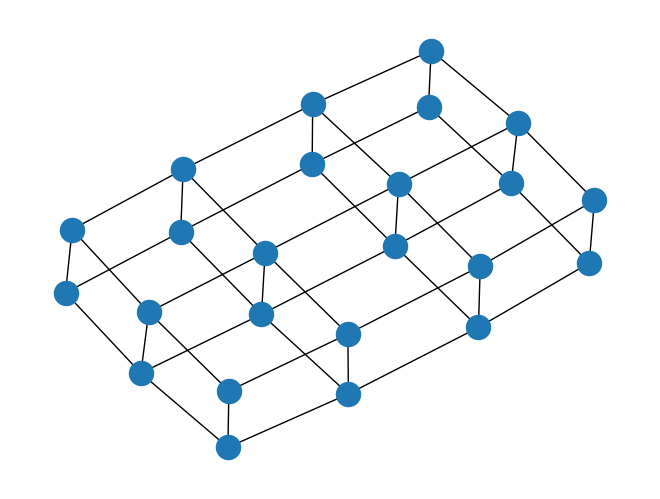

In [54]:
G = nx.grid_graph(dim=(2, 3, 4))
nx.draw(G)
A = nx.adjacency_matrix(G)
print(A)

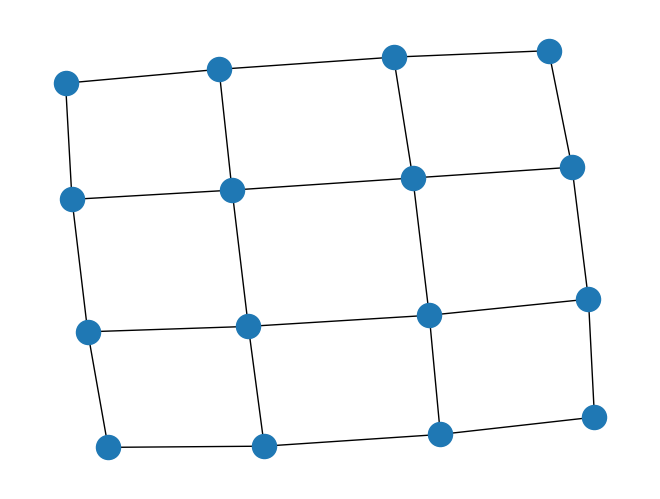

In [55]:
G = nx.grid_graph([4,4])
nx.draw(G)

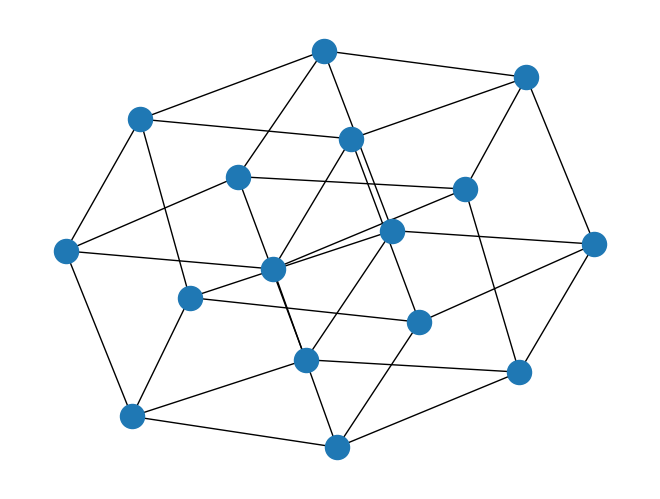

In [56]:
G = nx.grid_graph([2,2,2,2])
nx.draw(G)

# **Binomial graph**

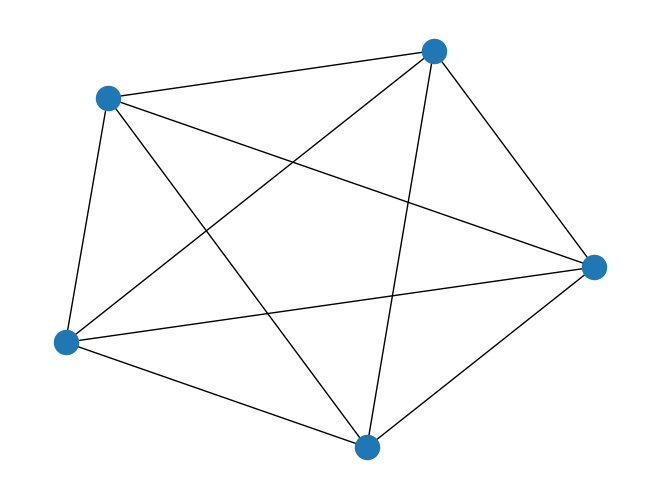

In [57]:
G = nx.binomial_graph(5, 1, seed=None, directed=False)
nx.draw(G)